In [1]:
import uuid
import pandas
import numpy
from random import shuffle

import sklearn
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.manifold

import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import os

In [20]:
def load_data():
    
    filename = "/Users/simondi/PHD/data/data/target_infect_x/screening_data/infectx-bartonella-d-p-g-1-dz14-2a_cells_data.tsv"

    data = pandas.read_csv(filename, sep="\t", header=0)

    feature_cols = [(i, x) for i, x in enumerate(data.columns.values) if
                    x.startswith("cells")]
    for i, c in feature_cols:
        data.loc[:, c] = data.loc[:, c].astype('float64')

    X = data.dropna(subset=["cells.children_invasomes_count"], how='all')
    X["cells.children_invasomes_count"] =  X["cells.children_invasomes_count"].fillna(0)
    X = X.dropna()
    X["infection"] = X["cells.children_invasomes_count"]
    del X["cells.children_invasomes_count"]
    
    return X

In [ ]:
def plot(data, gene_list, cnt):

    shuffle(gene_list)
    used_genes = gene_list[1:cnt]
    X = data[ data["gene"].isin(used_genes)]
     
    uniq = list(set(X["gene"]))

    hot = plt.get_cmap('hot')
    cNorm = colors.Normalize(vmin=0, vmax=len(uniq))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)
    alpha = 0.5

    plt.figure()
    for i in range(len(uniq)):
        indx = X["gene"] == uniq[i]
        plt.scatter(X.loc[indx, "cells.location_center_x"], X.loc[indx, "cells.location_center_x"],
                    color=scalarMap.to_rgba(i),
                    label=uniq[i], marker=".", alpha=alpha)
    if len(uniq) < 20:     
        plt.legend()    
    
    uid = str(uuid.uuid1())
    plt.show()

In [21]:
X = load_data()

In [22]:
gene_list = list(set(X["gene"]))

In [23]:
cnt  = 10

In [35]:
shuffle(gene_list)
used_genes = gene_list[1:cnt]
Y = X.groupby("gene").apply(lambda x: x.sample(10))
Y = Y[ Y["gene"].isin(used_genes)]

In [36]:
uniq = list(set(Y["gene"]))
len(uniq)

9

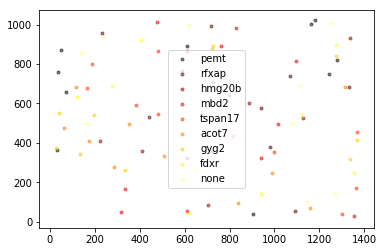

In [39]:
hot = plt.get_cmap('hot')
cNorm = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)
alpha = 0.5

plt.figure()
for i in range(len(uniq)):
    indx = Y["gene"] == uniq[i]
    plt.scatter(Y.loc[indx, "cells.location_center_x"], Y.loc[indx, "cells.location_center_y"],
                color=scalarMap.to_rgba(i),
                label=uniq[i], marker=".", alpha=alpha)
if len(uniq) < 20:     
    plt.legend()    

uid = str(uuid.uuid1())
plt.show()

In [45]:
def plot_tsna(X2, X):
    uniq = list(set(X["gene"]))
    
    hot = plt.get_cmap('hot')
    cNorm = colors.Normalize(vmin=0, vmax=len(uniq))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)
    alpha = 0.5
    
    plt.figure()
    for i in range(len(uniq)):
        indx = X["gene"] == uniq[i]
        plt.scatter(X2[indx, 1], X2[indx, 0], color=scalarMap.to_rgba(i),
                    label=uniq[i], marker=".", alpha=alpha)
    if len(uniq) < 20:     
        plt.legend()    
    uid = str(uuid.uuid1())
#     plt.savefig(
#       "/Users/simondi/PROJECTS/target_infect_x_project/src/tix_util/tix_analysis/plots/scatter_" + method + "_2d" +uid+ ".png",
#       dpi=720)
#     plt.close()
    plt.show()

In [ ]:
feature_cols_idxs = [x for x in X.columns.values if x.startswith("cells")]
x = 30
ts2 = sklearn.manifold.TSNE(n_components=2, perplexity=x, n_iter=5000)
X2 = ts2.fit_transform(X.loc[:, feature_cols_idxs])

plot_tsna(X2, X, "tsne_" + str(x))